In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn import metrics

In [53]:
train_ds = pd.read_csv('/data/spotify_data_train.csv', index_col=0)
test_ds = pd.read_csv('/data/spotify_data_test.csv', index_col=0)

train_ds.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Views,Likes,Comments,Description,Licensed,official_video,Stream,Artist_encoded,Album_encoded,Album_type_encoded
16630,Ozuna,https://open.spotify.com/artist/1i8SpTcr7yvPOm...,Diles,Diles,single,spotify:track:6C1RD7YQVvt3YQj0CmuTeu,0.813,0.560,2.0,-5.904,...,9.863890e+08,3786962.0,81763.0,"Diles - Bad Bunny, Ozuna, Farruko, Arcangel, Ñ...",True,True,6.284248e+08,1404,2606,2
15211,Shashaa Tirupati,https://open.spotify.com/artist/12CpR4SNDzVIlD...,"Bodhai Kaname - From ""Oh Manapenne""","Bodhai Kaname (From ""Oh Manapenne"")",single,spotify:track:4qIMmEjV8gaEsfZML9LALx,0.516,0.405,7.0,-12.327,...,1.879494e+07,136549.0,1769.0,#OhManapenne | #BodhaiKaname Video Song | #Ani...,True,True,2.632915e+07,1641,1451,2
11276,Billy Talent,https://open.spotify.com/artist/08yf5A2nS4XEeN...,Surrender,Billy Talent II,album,spotify:track:1DeaByFASTvBxtYANOyFXy,0.622,0.933,9.0,-3.277,...,5.611126e+06,39070.0,1394.0,"From the album ""Billy Talent II"".\n\nAvailable...",True,True,4.981235e+07,205,1344,0
13023,J Balvin,https://open.spotify.com/artist/1vyhD5VmyZ7KMf...,I Like It,Invasion of Privacy,album,spotify:track:58q2HKrzhC3ozto2nDdN4z,0.816,0.726,5.0,-3.998,...,1.524946e+09,10304827.0,315894.0,"Cardi B, Bad Bunny & J Balvin - I Like It from...",True,True,1.456861e+09,780,4725,0
4591,Bonnie Tyler,https://open.spotify.com/artist/0SD4eZCN4Kr0wQ...,Have You Ever Seen the Rain?,Faster Than the Speed of Night,album,spotify:track:2ZmMvjrJNTWsbAFScnPHbm,0.545,0.702,4.0,-12.182,...,5.666662e+06,33126.0,918.0,Bonnie Tyler's official music video for 'Have ...,True,True,8.515383e+06,235,3391,0


In [54]:
test_ds.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Views,Likes,Comments,Description,Licensed,official_video,Stream,Artist_encoded,Album_encoded,Album_type_encoded
19563,6ix9ine,https://open.spotify.com/artist/7gZfnEnfiaHzxA...,GOTTI,Day69: Graduation Day,album,spotify:track:27oFpFktCq9JIXjJQRuv7a,0.728,0.584,10.0,-7.255,...,534681903.0,4097001.0,270865.0,"Watch the official music video for ""Gotti"" by ...",False,False,231064701.0,17,2391,0
9743,Wisin,https://open.spotify.com/artist/3E6xrwgnVfYCrC...,Nota de Amor (feat. Daddy Yankee),Los Vaqueros: La Trilogía,album,spotify:track:4YW2Fr25fHwUt6qgvM1iE1,0.806,0.929,10.0,-3.017,...,698259186.0,1929000.0,43155.0,Nota de Amor Official Music Video Get Wisin's ...,True,True,186724705.0,1958,5609,0
355,Beyoncé,https://open.spotify.com/artist/6vWDO969PvNqNY...,Love On Top,4,album,spotify:track:1z6WtY7X4HQJvzxC4UgkSf,0.652,0.749,0.0,-5.248,...,514532529.0,2260106.0,93092.0,Beyoncé's official video for 'Love On Top'. Cl...,True,True,524847088.0,194,194,0
12607,Amitabh Bhattacharya,https://open.spotify.com/artist/2fMqTqiTxUDlmc...,"Kahani (From ""Laal Singh Chaddha"")","Kahani (From ""Laal Singh Chaddha"")",single,spotify:track:7Lcp4QlpR3RDngYejm4fmS,0.406,0.336,1.0,-12.011,...,484988.0,15590.0,524.0,Presenting 'Kahani' - Full Video version. A tr...,True,True,21672529.0,91,4958,2
17678,Saweetie,https://open.spotify.com/artist/6cK3NBO6uP7hh0...,ICY GRL,High Maintenance,album,spotify:track:1sl1cpix9GnwNwaVt04BIu,0.927,0.563,7.0,-5.827,...,131614929.0,1924520.0,37133.0,Watch the official music video for Icy GRL by ...,True,True,198920216.0,1612,4238,0


In [55]:
y_column = 'Stream'
X_columns = ['Artist_encoded', 'Album_encoded', 'Danceability', 'Energy', 'Key',
             'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
             'Valence', 'Tempo', 'Duration_ms']
X_train = train_ds[X_columns]
y_train = train_ds[y_column]
X_test = test_ds[X_columns]
y_test = test_ds[y_column]

In [56]:
models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(),
    'ElasticNet': ElasticNet(),
    'BayesianRidge': BayesianRidge(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'SVR': SVR(),
}

In [57]:
models_metrics = []

# Обчислюємо та зберігаємо оцінки для кожної моделі
for name, model in models.items():
    print('Training', name)
    regressor = model
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
    r2 = metrics.r2_score(y_test, y_pred)
    models_metrics.append((name, mae, mape, mse, rmse, r2))

Training LinearRegression
Training RandomForestRegressor
Training ElasticNet
Training BayesianRidge
Training GradientBoostingRegressor
Training SVR


MAE: 
BayesianRidge: 143342067.26066822
ElasticNet: 141273679.31514084
LinearRegression: 140525289.1183768
RandomForestRegressor: 135963822.64001566
GradientBoostingRegressor: 135187117.5519425
SVR: 116010463.48770735
MAPE: 
BayesianRidge: 25.41167958425099
RandomForestRegressor: 24.679283533475385
GradientBoostingRegressor: 24.35655065352607
ElasticNet: 24.29521675052608
LinearRegression: 21.911380374368697
SVR: 9.07217395119745
MSE: 
SVR: 6.361829385073325e+16
BayesianRidge: 5.6334201168759096e+16
ElasticNet: 5.513484284241306e+16
LinearRegression: 5.458401891660141e+16
GradientBoostingRegressor: 5.259865854857774e+16
RandomForestRegressor: 4.679116759536305e+16
RMSE: 
SVR: 252226671.56891486
BayesianRidge: 237348269.78252673
ElasticNet: 234808097.90638196
LinearRegression: 233632230.04671553
GradientBoostingRegressor: 229343974.30187204
RandomForestRegressor: 216312661.6621483


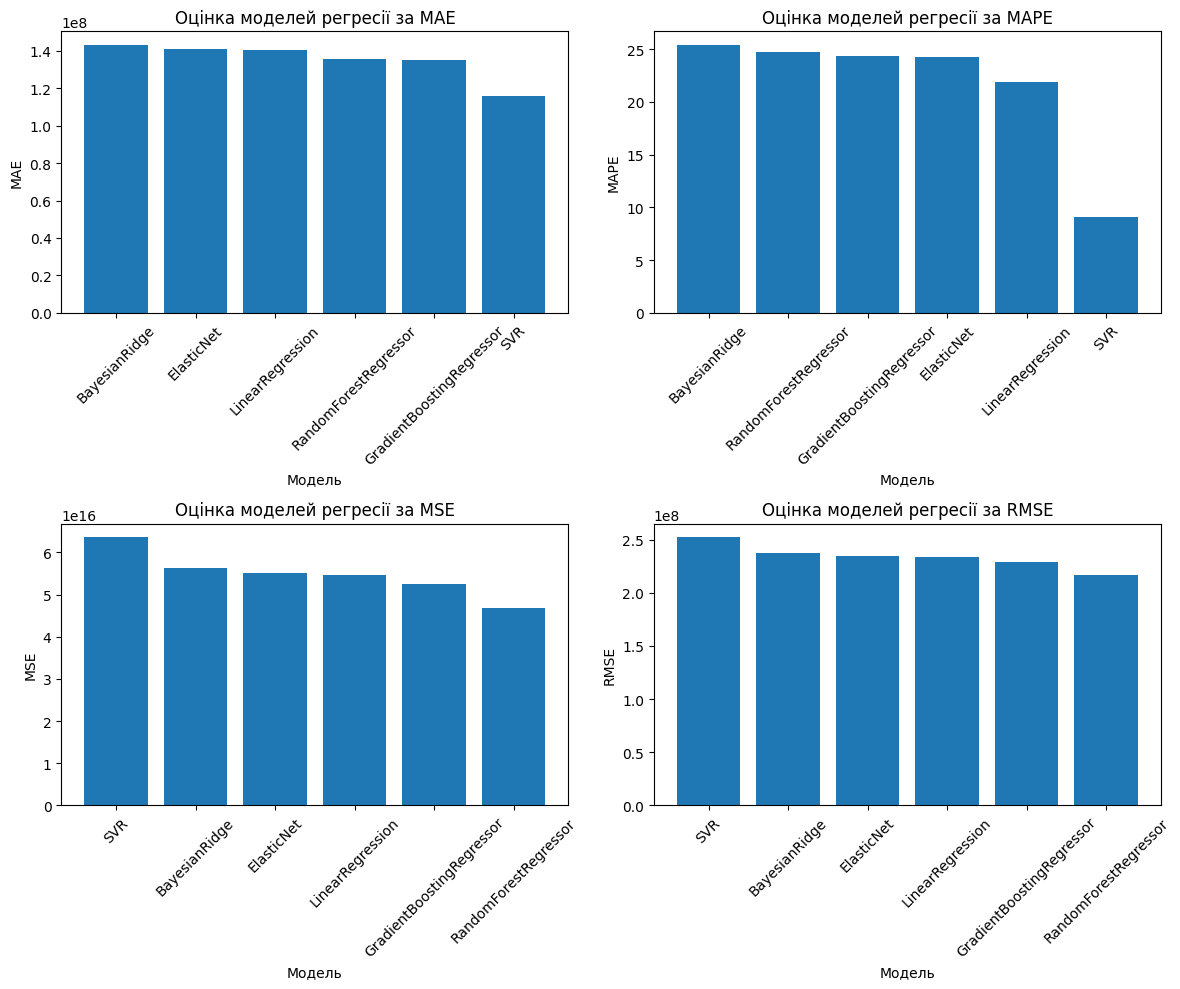

MAE: 
BayesianRidge: 143342067.26066822
ElasticNet: 141273679.31514084
LinearRegression: 140525289.1183768
RandomForestRegressor: 135231205.2597157
GradientBoostingRegressor: 135161898.40185192
SVR: 116010463.48770735
MAPE: 
BayesianRidge: 25.41167958425099
RandomForestRegressor: 24.41394819614582
GradientBoostingRegressor: 24.36321266836954
ElasticNet: 24.29521675052608
LinearRegression: 21.911380374368697
SVR: 9.07217395119745
MSE: 
SVR: 6.361829385073325e+16
BayesianRidge: 5.6334201168759096e+16
ElasticNet: 5.513484284241306e+16
LinearRegression: 5.458401891660141e+16
GradientBoostingRegressor: 5.2583625794830184e+16
RandomForestRegressor: 4.644357945212304e+16
RMSE: 
SVR: 252226671.56891486
BayesianRidge: 237348269.78252673
ElasticNet: 234808097.90638196
LinearRegression: 233632230.04671553
GradientBoostingRegressor: 229311198.5813824
RandomForestRegressor: 215507724.80846953


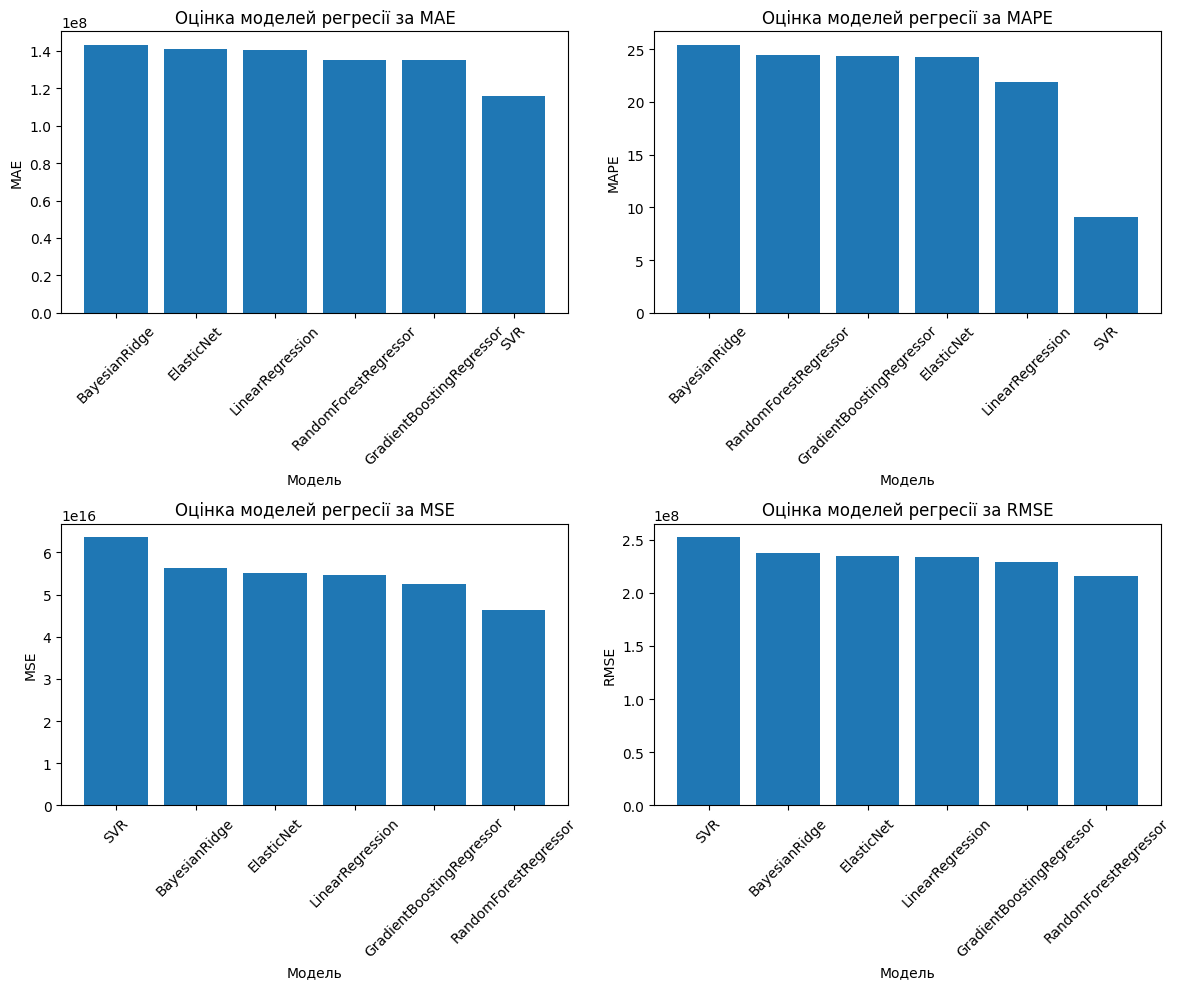

In [58]:
# Створюємо графіки
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, ax in enumerate(axes.flat):
    # Сортуємо моделі за оцінкою в порядку спадання
    models_metrics.sort(key=lambda x: x[i+1], reverse=True)
    # Отримуємо назви моделей та оцінки для графіків
    model_names = [item[0] for item in models_metrics]
    metrics_names = ['MAE', 'MAPE', 'MSE', 'RMSE']
    metrics_scores = [[item[i] for item in models_metrics] for i in range(1, 5)]
    ax.bar(model_names, metrics_scores[i])
    ax.set_xlabel('Модель')
    ax.set_ylabel(metrics_names[i])
    ax.set_title(f'Оцінка моделей регресії за {metrics_names[i]}')
    ax.tick_params(axis='x', rotation=45)
    print(f"{metrics_names[i]}: ")
    for model_idx in range(len(model_names)):
        print(f"{model_names[model_idx]}: {metrics_scores[i][model_idx]}")

plt.tight_layout()
plt.show()

In [59]:
X_test

,Artist_encoded,Album_encoded,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms
0,17,2391,0.728,0.584,10.0,-7.255,0.1760,0.05240,0.000000,0.0658,0.365,161.900,166852.0
1,1958,5609,0.806,0.929,10.0,-3.017,0.1210,0.26300,0.000000,0.0622,0.602,97.990,232373.0
2,194,194,0.652,0.749,0.0,-5.248,0.0886,0.08480,0.000000,0.6040,0.651,94.103,267413.0
3,91,4958,0.406,0.336,1.0,-12.011,0.0345,0.81500,0.000005,0.0888,0.327,149.354,208539.0
4,1612,4238,0.927,0.563,7.0,-5.827,0.1750,0.03060,0.000000,0.0736,0.842,103.312,109302.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,1117,9752,0.643,0.714,2.0,-5.504,0.0486,0.00444,0.000003,0.1460,0.205,120.027,132417.0
3830,1607,3101,0.856,0.709,3.0,-7.432,0.2220,0.34900,0.000209,0.2250,0.856,110.009,279500.0
3831,380,4759,0.888,0.584,7.0,-13.308,0.1120,0.03850,0.000003,0.0625,0.762,104.705,334440.0
3832,161,3343,0.524,0.643,9.0,-6.055,0.0297,0.45100,0.000000,0.2210,0.397,135.962,232059.0


,Artist_encoded,Album_encoded,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms
19563,17,2391,0.728,0.584,10.0,-7.255,0.1760,0.05240,0.000000,0.0658,0.365,161.900,166852.0
9743,1958,5609,0.806,0.929,10.0,-3.017,0.1210,0.26300,0.000000,0.0622,0.602,97.990,232373.0
355,194,194,0.652,0.749,0.0,-5.248,0.0886,0.08480,0.000000,0.6040,0.651,94.103,267413.0
12607,91,4958,0.406,0.336,1.0,-12.011,0.0345,0.81500,0.000005,0.0888,0.327,149.354,208539.0
17678,1612,4238,0.927,0.563,7.0,-5.827,0.1750,0.03060,0.000000,0.0736,0.842,103.312,109302.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17876,1117,9752,0.643,0.714,2.0,-5.504,0.0486,0.00444,0.000003,0.1460,0.205,120.027,132417.0
15853,1607,3101,0.856,0.709,3.0,-7.432,0.2220,0.34900,0.000209,0.2250,0.856,110.009,279500.0
2567,380,4759,0.888,0.584,7.0,-13.308,0.1120,0.03850,0.000003,0.0625,0.762,104.705,334440.0
20616,161,3343,0.524,0.643,9.0,-6.055,0.0297,0.45100,0.000000,0.2210,0.397,135.962,232059.0


In [60]:
y_test

0       231064701.0
1       186724705.0
2       524847088.0
3        21672529.0
4       198920216.0
           ...     
3829     22057596.0
3830     32595514.0
3831     24087037.0
3832    101104052.0
3833    306239899.0
Name: Stream, Length: 3834, dtype: float64

19563    231064701.0
9743     186724705.0
355      524847088.0
12607     21672529.0
17678    198920216.0
            ...     
17876     22057596.0
15853     32595514.0
2567      24087037.0
20616    101104052.0
17805    306239899.0
Name: Stream, Length: 3834, dtype: float64

In [61]:
y_pred

array([50397255.1334569 , 50397351.5734166 , 50397376.72151629, ...,
       50397365.27528412, 50397351.2880211 , 50397204.0308235 ])

array([50397255.1334569 , 50397351.5734166 , 50397376.72151629, ...,
       50397365.27528412, 50397351.2880211 , 50397204.0308235 ])